<a href="https://colab.research.google.com/github/electrojam/Curso-de-Regresion-Logistica-con-Python-y-scikit-learn/blob/main/regresion_logistica_multiclase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión logística multiclase

## Importar librerías

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

sns.set()

## Carga de datos

In [3]:
df = pd.read_csv("/content/Dry_Bean.csv")

In [4]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [6]:
# Miramos los datos únicos que contiene variable categórica columna Class

df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [9]:
# revisamos estadística de los datos
# verificamos que no hay nulos tampoco outlayers

df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Hacemos limpiza de datos

In [10]:
# Comenzamos eliminiando los valores duplicados

df.drop_duplicates(inplace=True)

## Mandejo de datos

In [14]:
# Revisamos si tenemos valores nulos en las variables

df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

## Undersampling

Reg# Graresión logística se maneja mucho mejor si tenemos dataset balanceado

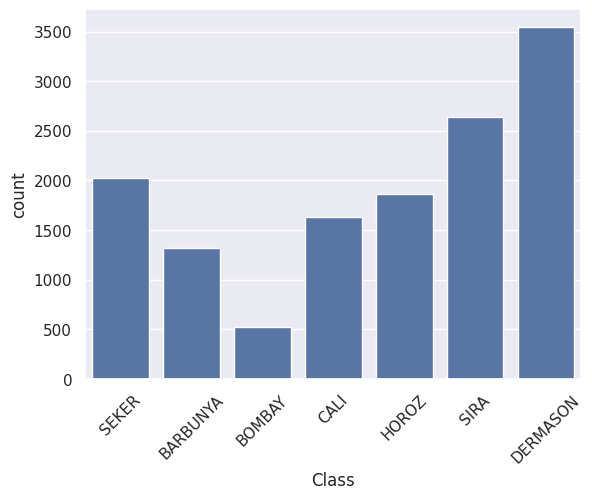

In [21]:
# Graficamos

sns.countplot(x='Class', data=df)
plt.xticks(rotation=45)
plt.show()

# En la grafica se observa que no se tiene un sistema desbalanceado la misma cantidad de ejemplos para todas las clases.
# algunas variables tienen muchos ejemplos y otras muy pocos.
# esto causa que el modelo aprenda a predecir mucho mejor valores de clase con más ejemplos.

In [24]:
# Solucinamos el problema del sistema desbalanceado

# Reducimos todas las Clases a la cantidad de datos  mínima,
#esto tiene contra se eliminan valores que pueden ser útiles

# Otra manera es crear ejemplos con la misma desv standar o misma varianza o misma características de cada clase
# para subir todas las gráficas al máximo valor.
# el problema es que se está creando ejemplos que no necesariamente son ciertos.

# Se optará por undersampling, se reduce la cantidad de datos a la clases mínima.

from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42) # 42 es para replicar los resultados y que salga exactamente igual

In [25]:
X = df.drop('Class', axis=1)
Y = df.Class

In [29]:
X_over, Y_over = undersample.fit_resample(X, Y) # Balanceo undesampling de todas las variables

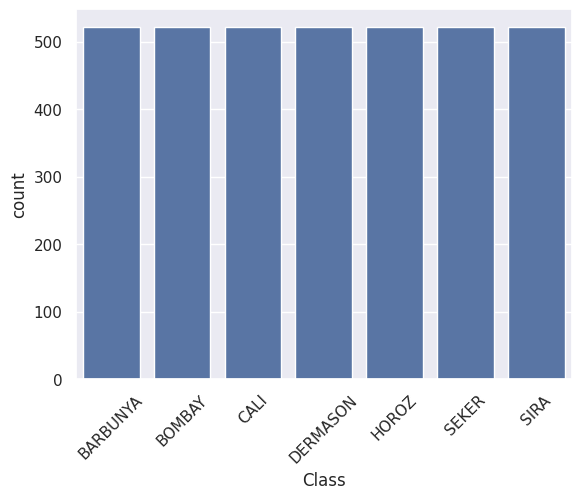

In [28]:
sns.countplot(data=X_over, x=Y_over)
plt.xticks(rotation=45)
plt.show()

In [30]:
df.shape

(13543, 17)

In [31]:
X_over.shape

(3654, 16)

## Conversión a numéricos

In [33]:
list(np.unique(Y_over)) # obtenemos una lista o array de los datos únicos de Class

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [34]:
# EN el nuevo dataset balanceado undersampleado, reemplazamos por 1, 2,3,4,5,6,7 valores de Class
Y_over.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [1,2,3,4,5,6,7], inplace=True)

In [36]:
list(np.unique(Y_over))

[1, 2, 3, 4, 5, 6, 7]